In [96]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# PCA와 t-SNE는 스케일링에 민감하므로 표준화 수행
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000164


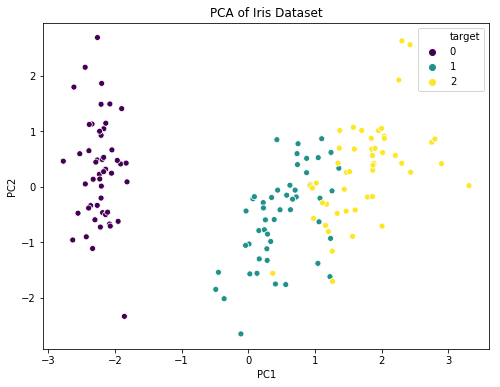

In [97]:
from sklearn.decomposition import PCA

# 1. PCA 객체 생성 (2차원으로 축소)
pca = PCA(n_components=2)

# 2. 데이터에 fit_transform 적용
principal_components = pca.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# 설명된 분산 비율 확인
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")
# Explained variance ratio: [0.72962445 0.22850762]
# Total explained variance: 0.9581320720000164

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.show()

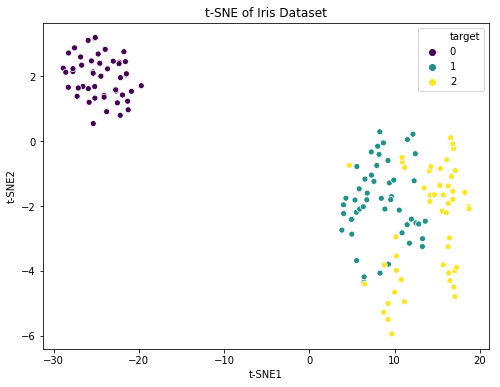

In [98]:
from sklearn.manifold import TSNE

# 1. t-SNE 객체 생성 (2차원으로 축소)
# perplexity: 각 점이 고려하는 이웃의 수. 보통 5~50 사이 값 사용.
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# 2. 데이터에 fit_transform 적용
tsne_features = tsne.fit_transform(scaled_features)

# 3. 결과를 데이터프레임으로 변환
df_tsne = pd.DataFrame(data=tsne_features, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = df['target']

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='target', data=df_tsne, palette='viridis')
plt.title('t-SNE of Iris Dataset')
plt.show()

In [95]:
# 사용자별 총 구매 금액 및 평균 구매 금액 파생 변수 생성
df['user_total_spent'] = df.groupby('user_id')['total_price'].transform('sum')
df['user_avg_spent'] = df.groupby('user_id')['total_price'].transform('mean')

# 사용자별 구매 횟수 파생 변수 생성
df['user_order_count'] = df.groupby('user_id')['order_id'].transform('count')

print("\n--- Derived from group statistics ---")
print(df[['user_id', 'total_price', 'user_total_spent', 'user_avg_spent', 'user_order_count']])


--- Derived from group statistics ---
   user_id  total_price  user_total_spent  user_avg_spent  user_order_count
0      101          200               440             220                 2
1      102          250               850             425                 2
2      101          240               440             220                 2
3      103          600               600             600                 1
4      102          600               850             425                 2


In [90]:
import pandas as pd

df = pd.DataFrame({
    'item': ['TV', 'Phone', 'Laptop', 'TV', 'Phone'],
    'grade': ['A', 'C', 'B', 'B', 'A'],
    'status': ['new', 'used', 'new', 'refurbished', 'used'],
    'target': [100, 200, 150, 120, 180]   # 예시 타겟 변수
})

# status별 target 평균값으로 매핑
mean_map = df.groupby('status')['target'].mean()
df['status_target_enc'] = df['status'].map(mean_map)

print(df[['status', 'status_target_enc']])

        status  status_target_enc
0          new                125
1         used                190
2          new                125
3  refurbished                120
4         used                190


In [91]:
# status를 정수로 변환
le = LabelEncoder()
df['status_int'] = le.fit_transform(df['status'])

# 정수를 2진수 문자열로 변환 후, 각 자리 분리
max_bits = df['status_int'].max().bit_length()
for i in range(max_bits):
    df[f'status_bin_{i}'] = df['status_int'].apply(lambda x: (x >> i) & 1)

print(df[['status', 'status_int'] + [f'status_bin_{i}' for i in range(max_bits)]])

        status  status_int  status_bin_0  status_bin_1
0          new           0             0             0
1         used           2             0             1
2          new           0             0             0
3  refurbished           1             1             0
4         used           2             0             1
